# Ensemble Learning

## Agenda

- Introduction to Ensemble Learning
  - Goals
  - Importance
  - Weak and Strong Learners in Ensemble Learning
- Categories in Ensemble Learning
  - Sequential Ensembling Technique
  - Parallel Ensembling Techniques
- Simple Ensembling Techniques
  - Voting
    - Hard Voting
    - Soft Voting
- Advanced Techniques
  - Bagging(BootStrap Aggregating)
    - Bagging Technique
    - Advantages
    - Disadvantages
    - Out-of-Bag Concept
  - Boosting
    - Boosting Techniques
    - Advantages
    - Disadvantages
  - Stacking
    - Advantages and Disadvantages

### Introduction to Ensemble Learning

Ensemble Learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental Principle of ensemble learning is combining te predictions from multiple individual models to produce more accurate  and robust prediction than any single model.

#### Goals
- Enhance predictive accuracy by combining multiple models
- Improve model robustness and generalization performance.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png)

### Importance
- Improves prediction Accuracy
- Enhance model resilience
- Mitigates biases and error present in individual models
- captures wide range of perspectives 

### Weak and Strong Learners in Ensemble Learning
- A **Weak Learner** or **Base Learner** is a learning algorithm capable of producing classifiers with the probability of error strictly less than that random guessing
- A **Strong Learner**  is able to yield classifiers with arbitarily small error probability. It performs much better than random guessing

An Ensemble (or Committee) of classifiers is a classifier build on some combination of weak learners. Through ensemble we try these classifiers to perform better than a single strong learner

## Categories in Ensemble Learning
Ensemble Learning can broadly classified into 2 categories
- Sequential Ensemble Technique
- Parallel Ensemble Technique

### Sequential Ensemble Technique

These techniques trains models sequentially, with each model trying to correct predecessor's error. This techniques focus upon improving the overall performance of the ensemble by iteratively refining predictions. it uses weak learner as base models. An Example of this approach is Boosting.
#### Steps
- **Base Model Selection** : Choose the initial Model
- **Sequential Training**
- **Error Correction**
- **Prediction Refinement**
- **Combining the Predictions**
- **Evaluation**

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png)

if all base models are of the same type, it is considered to be a homogeneous ensemble. if they are different, it is considered heterogeneous

**The Sequential Enseble technique is employed when dealing with**
- Complex Relation between features and target
- Diverse data types, including numerical, categorical etc data
- Imbalanced Datatsets
- Incremental upadtes are need to adapt models gradually to evolving data over time

### Parallel Ensemble Technique

The parallel ensemble techniques trains the models concurrently. They combine the preditions from multiple models to improve the final output. bagging and Random Forest are examples for parallel ensemble techniques. It employes strong learners as base estimators.

#### Steps
- **Data Partitioning** : Divide the dataset into subsets
- **Model Training**: Train models concurrently on subsets
- **Predictions**: models make independent predictions
- **Combining the Predictions**: aggregate preditions using techniques like voting(classification) or averaging(Regression)
- **Evaluation**: Assess the preformance


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png)

## Voting
Voting is one of the fundamental methods of ensemble learning. it involves aggregating the predictions from multiple models to arrive at a final prediction. Two common types of voting are
- Majority Voting / Hard Voting
- Weighted Voting / Soft Voting

### Majority Voting / Hard Voting
Majority Voting / Hard Voting is an ensemble learning classification technique. it involves multiple models, making predictions for each data point. Each model prediction is considered a **vote**. The final prediction is determined by majority voting among the models

#### Weighted Voting/Soft Voting
Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.

In [1]:
# Implement Hard Voting and Soft Voting on breast-cancer-wisconsin.data

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier

In [3]:
# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

col = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df =  pd.read_csv(url, header = None)
df.columns =  col
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
df.Class.value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [7]:
# Drop Sample code column, replace '?' in Bare Nuclei with 0 and convert to int64
# Replace class values to binary (2 for benign, 4 for malignant)

In [8]:
df = df.drop(columns = ['Sample code'])

In [9]:
df['Bare Nuclei'] =  df['Bare Nuclei'].replace('?', 0).astype('int64')

In [10]:
df['Class'] = df['Class'].replace({2:0, 4:1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [12]:
df.Class.value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [13]:
# Extract Feature and Target, do Train test split

X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  25)

In [14]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,4.423971,3.116279,3.211091,2.772809,3.207513,3.423971,3.441860,2.822898,1.533095
std,2.850680,3.041953,2.966084,2.834802,2.196416,3.614616,2.399171,3.011765,1.640186
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,3.500000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: ylabel='Density'>

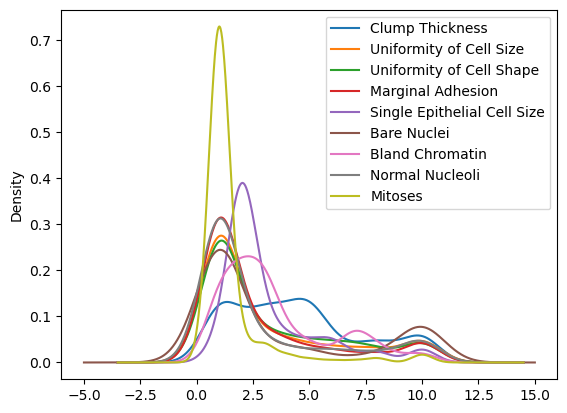

In [15]:
X_train.plot.kde()

In [16]:
scaler =  MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [17]:
# Initialize the list of base models

estimators = [
    ('logistic', LogisticRegression()),
    ('dtc', DecisionTreeClassifier()),
    ('svc', SVC(probability = True))
]

In [18]:
# Create Voting Classifier ensemble with estimators(HARD VOTING)

ensemble =  VotingClassifier(estimators, voting = 'hard')

# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Train an evaluate model using Cross Validation

results = cross_val_score(ensemble, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Hardvoting Ensemble {results.mean():.4f}')

ensemble.fit(X_train_scaled, y_train)

y_test_pred = ensemble.predict(X_test_scaled)

print(f'Test Accuracy  - Hardvoting Ensemble {accuracy_score(y_test, y_test_pred):.4f}')

Mean Cross Validation Accuracy - Hardvoting Ensemble 0.9607
Test Accuracy  - Hardvoting Ensemble 0.9500


Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        94
           1       0.90      0.96      0.93        46

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



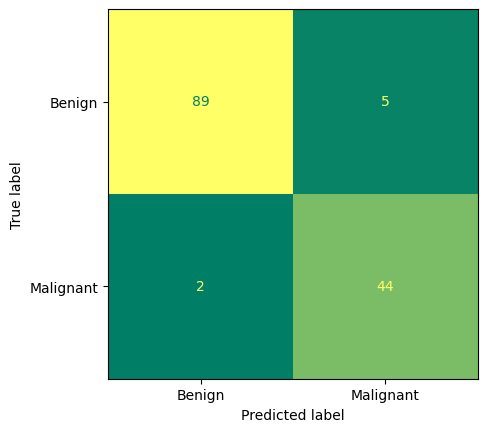

In [19]:
print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

Mean Cross Validation Accuracy - Softvoting Ensemble 0.9607
Test Accuracy  - Softvoting Ensemble 0.9500
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        94
           1       0.88      0.98      0.93        46

    accuracy                           0.95       140
   macro avg       0.94      0.96      0.94       140
weighted avg       0.95      0.95      0.95       140



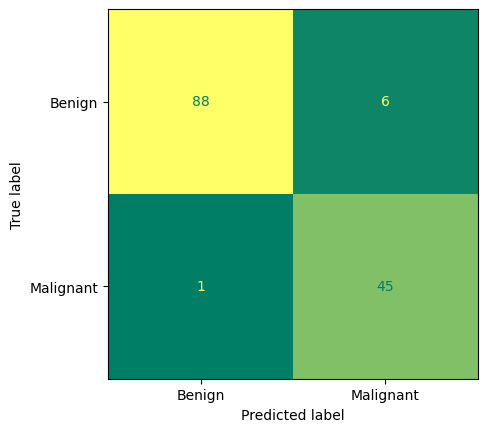

In [20]:
# Create Voting Classifier ensemble with estimators(Soft VOTING)

ensemble =  VotingClassifier(estimators, voting = 'soft')

# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Train an evaluate model using Cross Validation

results = cross_val_score(ensemble, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Softvoting Ensemble {results.mean():.4f}')

ensemble.fit(X_train_scaled, y_train)

y_test_pred = ensemble.predict(X_test_scaled)

print(f'Test Accuracy  - Softvoting Ensemble {accuracy_score(y_test, y_test_pred):.4f}')


print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

## Advanced Techniques
These techniques use complex methods to merge the predictions from individual models.

## Bagging


Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.__Note:__ Random Forest is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png)

In [22]:
# Implementation

from sklearn.ensemble import BaggingClassifier

In [23]:
# load the data

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df =  pd.read_csv(url, names = names)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# Extract Feature and Target, do Train test split

X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  25)

In [25]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [26]:
scaler =  MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [27]:
# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

In [28]:
cart =  DecisionTreeClassifier()
num_trees = 100

In [29]:
bagging_model =  BaggingClassifier(estimator = cart, n_estimators = num_trees, random_state = 25, oob_score = True)

Mean Cross Validation Accuracy - Bagging Classifier 0.7525
Test Accuracy  -Bagging Classifier 0.8052
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



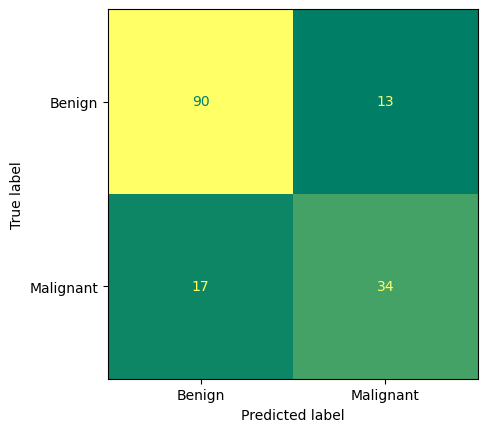

In [31]:
# Train an evaluate model using Cross Validation

results = cross_val_score(bagging_model, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Bagging Classifier {results.mean():.4f}')

bagging_model.fit(X_train_scaled, y_train)

y_test_pred = bagging_model.predict(X_test_scaled)

print(f'Test Accuracy  -Bagging Classifier {accuracy_score(y_test, y_test_pred):.4f}')


print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)